In [1]:
from pandas import Series, DataFrame
import pandas as pd

In [2]:
DataTable = pd.read_csv('OneDrive/Documents/MAN385 Sports Analytics/PlaybyPlayFinal.csv')
DataTable["Unique"] = DataTable['Year'].map(str) + DataTable["Opponent"] + DataTable['GameNumber'].map(str)
TX2015 = DataTable[DataTable['Year'] == 2015]
TX2016 = DataTable[DataTable['Year'] == 2016]
TX2017 = DataTable[DataTable['Year'] == 2017]
TX2018 = DataTable[DataTable['Year'] == 2018]

First36 = DataTable[DataTable['Seconds'] > 240]
Final4 = DataTable[DataTable['Seconds'] < 180]

CloseGame = Final4[Final4['CloseGame'] == 1]
DataTable[-5:]

,Time,Possession,Player,Text,AwayScore,HomeScore,TexWBy,Foul,TTNV,OTNV,...,OORB,CloseGame,Venue,Big12,Opponent,GameNumber,Year,Win,Seconds,Unique
42278,0:48,LIP,ahsan asadullah,"['made', 'layup.']",64,81,17,0,0,0,...,0,0,HOME,0,LIP,35,2018,1,48,2018LIP35
42279,0:31,Texas,royce hamm,"['jr.', 'turnover.']",64,81,17,0,1,0,...,0,0,HOME,0,LIP,35,2018,1,31,2018LIP35
42280,0:31,LIP,ahsan asadullah,['steal.'],64,81,17,0,0,0,...,0,0,HOME,0,LIP,35,2018,1,31,2018LIP35
42281,0:04,LIP,john matt,"['merritt', 'made', 'jumper.', 'assisted', 'by...",66,81,15,0,0,0,...,0,0,HOME,0,LIP,35,2018,1,4,2018LIP35
42282,0:00,Texas,end of,['game'],66,81,15,0,0,0,...,0,0,HOME,0,LIP,35,2018,1,0,2018LIP35


In [66]:
DataTable.columns.values

array(['Time', 'Possession', 'Player', 'Text', 'AwayScore', 'HomeScore',
       'TexWBy', 'Foul', 'TTNV', 'OTNV', 'T3PA', 'T3PM', 'O3PA', 'O3PM',
       'TLDA', 'TLDM', 'OLDA', 'OLDM', 'TJA', 'TJM', 'OJA', 'OJM', 'TFTA',
       'TFTM', 'OFTA', 'OFTM', 'TASST', 'OASST', 'TORB', 'OORB',
       'CloseGame', 'Venue', 'Big12', 'Opponent', 'GameNumber', 'Year',
       'Win', 'Seconds', 'Unique'], dtype=object)

In [181]:
RealCrunch = RealCrunch[RealCrunch['Text'] == "['defensive', 'rebound.']"]

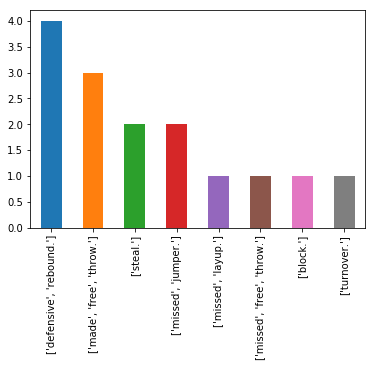

In [135]:
Shots_By_Roach = RealCrunch[RealCrunch['Player'] == "dylan osetkowski"]
Shots_By_Roach['Text'].value_counts().plot(kind='bar')

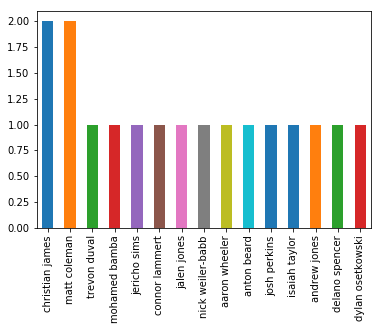

In [137]:
Shots_By_Roach = RealCrunch[RealCrunch['Text'] == "['turnover.']"]
Shots_By_Roach['Player'].value_counts().plot(kind='bar')

In [4]:
PivotsWin = pd.pivot_table(TX2015, values = ['TORB',"Win"], index = 'Opponent', dropna = True, aggfunc = 'mean')

In [95]:
len(DataTable)

42283

In [5]:
GameSums = TX2015.groupby('Opponent').sum()

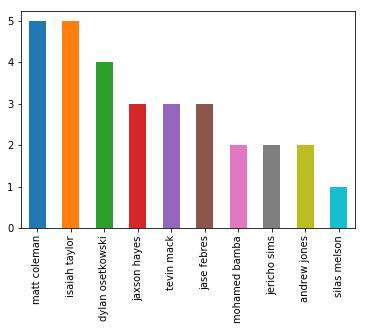

In [24]:
Turnovers_By_Play = CloseGame[CloseGame['Text'] == "['turnover.']"]
Turnovers_By_Player = Turnovers_By_Play[Turnovers_By_Play['Possession'] == "Texas"]
Turnovers_By_Player['Player'].value_counts()[:10].plot(kind='bar')

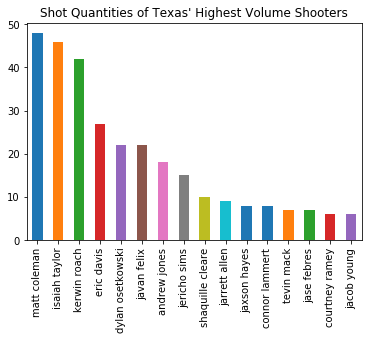

In [147]:
TexClose = CloseWins[CloseWins['Possession'] == "Texas"]
MadeShots = TexClose[TexClose['Text'].str.contains("made")]
MissedShots = TexClose[TexClose['Text'].str.contains("missed")]
TookShots = MadeShots.append(MissedShots)
Yes = TookShots['Player'].value_counts().sort_values(ascending = False)[:16]
No =  MadeShots['Player'].value_counts().sort_values(ascending = False)[:16]
ShotPerc = No/Yes*100
Yes.sort_values(ascending=False).plot(kind='bar', title = "Shot Quantities of Texas' Highest Volume Shooters")


In [148]:
print Yes
print No
print ShotPerc

matt coleman        48
isaiah taylor       46
kerwin roach        42
eric davis          27
javan felix         22
dylan osetkowski    22
andrew jones        18
jericho sims        15
shaquille cleare    10
jarrett allen        9
connor lammert       8
jaxson hayes         8
jase febres          7
tevin mack           7
jacob young          6
courtney ramey       6
Name: Player, dtype: int64
isaiah taylor       34
matt coleman        34
kerwin roach        20
eric davis          19
dylan osetkowski    12
andrew jones        12
javan felix         12
jericho sims        10
jaxson hayes         7
shaquille cleare     6
jarrett allen        6
tevin mack           5
jacob young          4
jase febres          4
connor lammert       4
mohamed bamba        3
Name: Player, dtype: int64
andrew jones        66.666667
connor lammert      50.000000
courtney ramey            NaN
dylan osetkowski    54.545455
eric davis          70.370370
isaiah taylor       73.913043
jacob young         66.666667


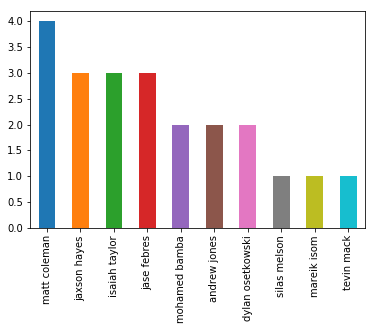

In [26]:
Turnovers_By_Play = CloseLoss[CloseLoss['Text'] == "['turnover.']"]
Turnovers_By_Player = Turnovers_By_Play[Turnovers_By_Play['Possession'] == "Texas"]
Turnovers_By_Player['Player'].value_counts()[:10].plot(kind='bar')

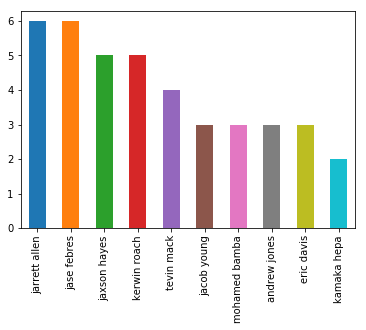

In [135]:
Assists_By_Play = CloseLoss[CloseLoss['TASST'] == 1]
Assists_By_Play['Player'].value_counts()[:10].plot(kind='bar')

### Close v Not-Close (Within 10 with <4min left)

In [3]:
TFTPC = float(CloseGame['TFTM'].sum())/float(CloseGame['TFTA'].sum())*100
TFTPNC = float(DataTable['TFTM'].sum())/float(DataTable['TFTA'].sum())*100
print "Texas shoots " + str(round(TFTPC,2)) + "% from Free Throws in close game situations"
print "Texas shoots " + str(round(TFTPNC,2)) + "% from Free Throws in all situations"

print

OFTPC = float(CloseGame['OFTM'].sum())/float(CloseGame['OFTA'].sum())*100
OFTPNC = float(DataTable['OFTM'].sum())/float(DataTable['OFTA'].sum())*100
print "Opponents shoots " + str(round(OFTPC,2)) + "% from Free Throws in close game situations"
print "Opponents shoots " + str(round(OFTPNC,2)) + "% from Free Throws in all situations"
 
print


T3PPC = float(CloseGame['T3PM'].sum())/float(CloseGame['T3PA'].sum())*100
T3PPNC = float(DataTable['T3PM'].sum())/float(DataTable['T3PA'].sum())*100
print "Texas shoots " + str(round(T3PPC,2)) + "% from 3 in close game situations"
print "Texas shoots " + str(round(T3PPNC,2)) + "% from 3 in all situations"

print

O3PPC = float(CloseGame['O3PM'].sum())/float(CloseGame['O3PA'].sum())*100
O3PPNC = float(DataTable['O3PM'].sum())/float(DataTable['O3PA'].sum())*100
print "Opponents shoot " + str(round(O3PPC,2)) + "% from 3 in close game situations"
print "Opponents shoot " + str(round(O3PPNC,2)) + "% from 3 in all situations"

print

TJPC = float(CloseGame['TJM'].sum())/float(CloseGame['TJA'].sum())*100
TJPNC = float(DataTable['TJM'].sum())/float(DataTable['TJA'].sum())*100
print "Texas shoots " + str(round(TJPC,2)) + "% on 2-pt jumpers in close game situations"
print "Texas shoots " + str(round(TJPNC,2)) + "% on 2-pt jumpers in all situations"

print

OJPC = float(CloseGame['OJM'].sum())/float(CloseGame['OJA'].sum())*100
OJPNC = float(DataTable['OJM'].sum())/float(DataTable['OJA'].sum())*100
print "Opponents shoot " + str(round(OJPC,2)) + "% on 2-pt jumpers in close game situations"
print "Opponents shoot " + str(round(OJPNC,2)) + "% on 2-pt jumpers in all situations"

print

TLDPC = float(CloseGame['TLDM'].sum())/float(CloseGame['TLDA'].sum())*100
TLDPNC = float(DataTable['TLDM'].sum())/float(DataTable['TLDA'].sum())*100
print "Texas shoots " + str(round(TLDPC,2)) + "% on Layups/Dunks/Tip-ins in close game situations"
print "Texas shoots " + str(round(TLDPNC,2)) + "% on Layups/Dunks/Tip-ins in all situations"

print

OLDPC = float(CloseGame['OLDM'].sum())/float(CloseGame['OLDA'].sum())*100
OLDPNC = float(DataTable['OLDM'].sum())/float(DataTable['OLDA'].sum())*100
print "Opponents shoot " + str(round(OLDPC,2)) + "% on Layups/Dunks/Tip-ins in close game situations"
print "Opponents shoot " + str(round(OLDPNC,2)) + "% on Layups/Dunks/Tip-ins in all situations"

TTSC = float(CloseGame['T3PA'].sum() + CloseGame['TJA'].sum() + CloseGame['TLDA'].sum())
TTSNC = float(DataTable['T3PA'].sum() + DataTable['TJA'].sum() + DataTable['TLDA'].sum())
OTSC = float(CloseGame['O3PA'].sum() + CloseGame['OJA'].sum() + CloseGame['OLDA'].sum())
OTSNC = float(DataTable['O3PA'].sum() + DataTable['OJA'].sum() + DataTable['OLDA'].sum())

print

print "Texas has taken " + str(int(TTSC)) + " shots in close games in the Shaka Smart era"
print "In close game situations, Texas takes " + str(round((CloseGame['T3PA'].sum()/TTSC)*100, 2)) + "% 3-pointers vs " + str(round((DataTable['T3PA'].sum()/TTSNC)*100, 2)) + "% overall"
print "In close game situations, Texas takes " + str(round((CloseGame['TJA'].sum()/TTSC)*100, 2)) + "% 2-pt jumpers vs " + str(round((DataTable['TJA'].sum()/TTSNC)*100, 2)) + "% overall"
print "In close game situations, Texas takes " + str(round((CloseGame['TLDA'].sum()/TTSC)*100, 2)) + "% layups/dunks/tip-ins vs " + str(round((DataTable['TLDA'].sum()/TTSNC)*100, 2)) + "% overall"

print

print "Opponents have taken " + str(int(OTSC)) + " shots in close games in the Shaka Smart era"
print "In close game situations, Opponents take " + str(round((CloseGame['O3PA'].sum()/OTSC)*100, 2)) + "% 3-pointers vs " + str(round((DataTable['O3PA'].sum()/OTSNC)*100, 2)) + "% overall"
print "In close game situations, Opponents take " + str(round((CloseGame['OJA'].sum()/OTSC)*100, 2)) + "% 2-pt jumpers vs " + str(round((DataTable['OJA'].sum()/OTSNC)*100, 2)) + "% overall"
print "In close game situations, Opponents take " + str(round((CloseGame['OLDA'].sum()/OTSC)*100, 2)) + "% layups/dunks/tip-ins vs " + str(round((DataTable['OLDA'].sum()/OTSNC)*100, 2)) + "% overall"

print

print "Texas has turned the ball over " + str(CloseGame['TTNV'].sum()) + " times in close-game situations"
print "Texas has forced " + str(CloseGame['OTNV'].sum()) + " turnovers in close-game situations"

print

print "Texas has allowed " + str(CloseGame['OORB'].sum()) + " offensive rebounds in close-game situations"
print "Texas has gained " + str(CloseGame['TORB'].sum()) + " possessions through offensive rebounds"



Texas shoots 69.36% from Free Throws in close game situations
Texas shoots 67.41% from Free Throws in all situations

Opponents shoots 70.26% from Free Throws in close game situations
Opponents shoots 69.74% from Free Throws in all situations

Texas shoots 35.88% from 3 in close game situations
Texas shoots 32.77% from 3 in all situations

Opponents shoot 26.42% from 3 in close game situations
Opponents shoot 33.53% from 3 in all situations

Texas shoots 32.77% on 2-pt jumpers in close game situations
Texas shoots 34.78% on 2-pt jumpers in all situations

Opponents shoot 43.52% on 2-pt jumpers in close game situations
Opponents shoot 33.75% on 2-pt jumpers in all situations

Texas shoots 64.43% on Layups/Dunks/Tip-ins in close game situations
Texas shoots 62.43% on Layups/Dunks/Tip-ins in all situations

Opponents shoot 57.5% on Layups/Dunks/Tip-ins in close game situations
Opponents shoot 59.8% on Layups/Dunks/Tip-ins in all situations

Texas has taken 438 shots in close games in the 

### Crunch v All (Crunch = Within 5 with under 60 seocnds left)

In [4]:
Crunch = CloseGame[CloseGame['Seconds'] < 60]
RealCrunch = Crunch[abs(Crunch['AwayScore']-Crunch['HomeScore']) < 6]
RealCrunch[-5:]

T3PPC = float(RealCrunch['T3PM'].sum())/float(RealCrunch['T3PA'].sum())*100
T3PPNC = float(DataTable['T3PM'].sum())/float(DataTable['T3PA'].sum())*100
print "Texas shoots " + str(round(T3PPC,2)) + "% from 3 in close game situations"
print "Texas shoots " + str(round(T3PPNC,2)) + "% from 3 in all situations"

print

O3PPC = float(RealCrunch['O3PM'].sum())/float(RealCrunch['O3PA'].sum())*100
O3PPNC = float(DataTable['O3PM'].sum())/float(DataTable['O3PA'].sum())*100
print "Opponents shoot " + str(round(O3PPC,2)) + "% from 3 in close game situations"
print "Opponents shoot " + str(round(O3PPNC,2)) + "% from 3 in all situations"

print

TJPC = float(RealCrunch['TJM'].sum())/float(RealCrunch['TJA'].sum())*100
TJPNC = float(DataTable['TJM'].sum())/float(DataTable['TJA'].sum())*100
print "Texas shoots " + str(round(TJPC,2)) + "% on 2-pt jumpers in close game situations"
print "Texas shoots " + str(round(TJPNC,2)) + "% on 2-pt jumpers in all situations"

print

OJPC = float(RealCrunch['OJM'].sum())/float(RealCrunch['OJA'].sum())*100
OJPNC = float(DataTable['OJM'].sum())/float(DataTable['OJA'].sum())*100
print "Opponents shoot " + str(round(OJPC,2)) + "% on 2-pt jumpers in close game situations"
print "Opponents shoot " + str(round(OJPNC,2)) + "% on 2-pt jumpers in all situations"

print

TLDPC = float(RealCrunch['TLDM'].sum())/float(RealCrunch['TLDA'].sum())*100
TLDPNC = float(DataTable['TLDM'].sum())/float(DataTable['TLDA'].sum())*100
print "Texas shoots " + str(round(TLDPC,2)) + "% on Layups/Dunks/Tip-ins in close game situations"
print "Texas shoots " + str(round(TLDPNC,2)) + "% on Layups/Dunks/Tip-ins in all situations"

print

OLDPC = float(RealCrunch['OLDM'].sum())/float(RealCrunch['OLDA'].sum())*100
OLDPNC = float(DataTable['OLDM'].sum())/float(DataTable['OLDA'].sum())*100
print "Opponents shoot " + str(round(OLDPC,2)) + "% on Layups/Dunks/Tip-ins in close game situations"
print "Opponents shoot " + str(round(OLDPNC,2)) + "% on Layups/Dunks/Tip-ins in all situations"

TTSC = float(RealCrunch['T3PA'].sum() + RealCrunch['TJA'].sum() + RealCrunch['TLDA'].sum())
TTSNC = float(DataTable['T3PA'].sum() + DataTable['TJA'].sum() + DataTable['TLDA'].sum())
OTSC = float(RealCrunch['O3PA'].sum() + RealCrunch['OJA'].sum() + RealCrunch['OLDA'].sum())
OTSNC = float(DataTable['O3PA'].sum() + DataTable['OJA'].sum() + DataTable['OLDA'].sum())

print

print "Texas has taken " + str(int(TTSC)) + " shots in close games in the Shaka Smart era"
print "In close game situations, Texas takes " + str(round((RealCrunch['T3PA'].sum()/TTSC)*100, 2)) + "% 3-pointers vs " + str(round((DataTable['T3PA'].sum()/TTSNC)*100, 2)) + "% overall"
print "In close game situations, Texas takes " + str(round((RealCrunch['TJA'].sum()/TTSC)*100, 2)) + "% 2-pt jumpers vs " + str(round((DataTable['TJA'].sum()/TTSNC)*100, 2)) + "% overall"
print "In close game situations, Texas takes " + str(round((RealCrunch['TLDA'].sum()/TTSC)*100, 2)) + "% layups/dunks/tip-ins vs " + str(round((DataTable['TLDA'].sum()/TTSNC)*100, 2)) + "% overall"

print

print "Opponents have taken " + str(int(OTSC)) + " shots in close games in the Shaka Smart era"
print "In close game situations, Opponents take " + str(round((RealCrunch['O3PA'].sum()/OTSC)*100, 2)) + "% 3-pointers vs " + str(round((DataTable['O3PA'].sum()/OTSNC)*100, 2)) + "% overall"
print "In close game situations, Opponents take " + str(round((RealCrunch['OJA'].sum()/OTSC)*100, 2)) + "% 2-pt jumpers vs " + str(round((DataTable['OJA'].sum()/OTSNC)*100, 2)) + "% overall"
print "In close game situations, Opponents take " + str(round((RealCrunch['OLDA'].sum()/OTSC)*100, 2)) + "% layups/dunks/tip-ins vs " + str(round((DataTable['OLDA'].sum()/OTSNC)*100, 2)) + "% overall"

print

print "Texas has turned the ball over " + str(RealCrunch['TTNV'].sum()) + " times in close-game situations"
print "Texas has forced " + str(RealCrunch['OTNV'].sum()) + " turnovers in close-game situations"

print

print "Texas has allowed " + str(RealCrunch['OORB'].sum()) + " offensive rebounds in close-game situations"
print "Texas has gained " + str(RealCrunch['TORB'].sum()) + " possessions through offensive rebounds"

print
TexPoss = RealCrunch[RealCrunch['Possession'] == "Texas"]
TexFouls = TexPoss['Foul'].sum()
OppFouls = RealCrunch['Foul'].sum() - TexFouls
print "Texas has fouled opponents " + str(OppFouls) + " times in close situations"
print "Texas has been fouled " + str(TexFouls) + " times in close situations"



Texas shoots 39.71% from 3 in close game situations
Texas shoots 32.77% from 3 in all situations

Opponents shoot 28.0% from 3 in close game situations
Opponents shoot 33.53% from 3 in all situations

Texas shoots 26.92% on 2-pt jumpers in close game situations
Texas shoots 34.78% on 2-pt jumpers in all situations

Opponents shoot 40.0% on 2-pt jumpers in close game situations
Opponents shoot 33.75% on 2-pt jumpers in all situations

Texas shoots 67.31% on Layups/Dunks/Tip-ins in close game situations
Texas shoots 62.43% on Layups/Dunks/Tip-ins in all situations

Opponents shoot 58.67% on Layups/Dunks/Tip-ins in close game situations
Opponents shoot 59.8% on Layups/Dunks/Tip-ins in all situations

Texas has taken 172 shots in close games in the Shaka Smart era
In close game situations, Texas takes 39.53% 3-pointers vs 38.02% overall
In close game situations, Texas takes 30.23% 2-pt jumpers vs 28.03% overall
In close game situations, Texas takes 30.23% layups/dunks/tip-ins vs 33.95% ove

In [5]:
TEV = round((float(RealCrunch['T3PA'].sum())/TTSC), 2)*(T3PPC/100)*3 + round(float(RealCrunch['TJA'].sum()/TTSC), 2)*(TJPC/100)*2 + round(float(RealCrunch['TLDA'].sum()/TTSC), 2)*(TLDPC/100)*2
print "In crunch scenarios, Texas has an expected value of " + str(round(TEV,3))  + " per shot"

OEV = round(float(RealCrunch['O3PA'].sum()/OTSC), 2)*(O3PPC/100)*3 + round(float(RealCrunch['OJA'].sum()/OTSC), 2)*(OJPC/100)*2 + round(float(RealCrunch['OLDA'].sum()/OTSC), 2)*(OLDPC/100)*2
print "In crunch scenarios, Opponents have an expected value of " + str(round(OEV,3))  + " per shot"

TexPoss = RealCrunch['TJA'].sum() + RealCrunch['TLDA'].sum() + RealCrunch['T3PA'].sum() + RealCrunch['TTNV'].sum() - RealCrunch['TORB'].sum() +  float(RealCrunch['TFTA'].sum())/2


OppPoss = RealCrunch['OJA'].sum() + RealCrunch['OLDA'].sum() + RealCrunch['O3PA'].sum() + RealCrunch['OTNV'].sum() - RealCrunch['OORB'].sum() + float(RealCrunch['OFTA'].sum())/2
print

print "Texas shoots the ball on " + str(round((float(RealCrunch['TJA'].sum() + RealCrunch['TLDA'].sum() + RealCrunch['T3PA'].sum())/TexPoss)*100,2)) + "% of crunch-time possessions"

print "Opponents shoot the ball on " + str(round((float(RealCrunch['OJA'].sum() + RealCrunch['OLDA'].sum() + RealCrunch['O3PA'].sum())/OppPoss)*100,2)) + "% of crunch-time possessions"

print 

print "Texas turns the ball over on " + str(round((float(RealCrunch['TTNV'].sum())/TexPoss)*100,2)) + "% of crunch-time possessions"

print "Opponents turn the ball over on " + str(round((float(RealCrunch['OTNV'].sum())/OppPoss)*100,2)) + "% of crunch-time possessions"

print 

print "Texas gets fouled on " + str(round(float(OppFouls)/TexPoss*100,2)) + "% of crunch-time possessions"

print "Opponents get fouled on " + str(round(float(TexFouls)/OppPoss*100,2)) + "% of crunch-time possessions"

TFTPC = float(RealCrunch['TFTM'].sum())/float(RealCrunch['TFTA'].sum())
TFTP = float(DataTable['TFTM'].sum())/float(DataTable['TFTA'].sum())
print
print "Texas shoots " + str(round(TFTP,2)*100) + "% from the free throw line overall"
print "Texas shoots " + str(round(TFTPC,2)*100) + "% from the free throw line in crunch situations"

In crunch scenarios, Texas has an expected value of 1.042 per shot
In crunch scenarios, Opponents have an expected value of 0.965 per shot

Texas shoots the ball on 75.27% of crunch-time possessions
Opponents shoot the ball on 83.16% of crunch-time possessions

Texas turns the ball over on 7.44% of crunch-time possessions
Opponents turn the ball over on 8.32% of crunch-time possessions

Texas gets fouled on 45.51% of crunch-time possessions
Opponents get fouled on 36.17% of crunch-time possessions

Texas shoots 67.0% from the free throw line overall
Texas shoots 65.0% from the free throw line in crunch situations


In [9]:
NumGames = len(DataTable[DataTable['Text'] == "['game']"])

In [6]:
TexOffPtsScored = RealCrunch['TJM'].sum()*2 + RealCrunch['TLDM'].sum()*2 + RealCrunch['T3PM'].sum()*3 + RealCrunch['TFTM'].sum()
TexOffEff = float(TexOffPtsScored)/TexPoss*100
print round(TexOffEff,2)

OppOffPtsScored = RealCrunch['OJM'].sum()*2 + RealCrunch['OLDM'].sum()*2 + RealCrunch['O3PM'].sum()*3 + RealCrunch['OFTM'].sum()
TexDefEff = float(OppOffPtsScored)/OppPoss*100
print round(TexDefEff,2)

TexFullOffPtsScored = TX2018['TJM'].sum()*2 + TX2018['TLDM'].sum()*2 + TX2018['T3PM'].sum()*3 + TX2018['TFTM'].sum()
TexFullPoss = TX2018['TJA'].sum() + TX2018['TLDA'].sum() + TX2018['T3PA'].sum() + TX2018['TTNV'].sum() - TX2018['TORB'].sum() +  float(TX2018['TFTA'].sum())/2
TexFullOffEff = float(TexFullOffPtsScored)/TexFullPoss*100
print round(TexFullOffEff,2)

115.54
113.51
104.23


In [16]:
CloseWins = CloseGame[CloseGame['Win'] == 1]
CloseLoss = CloseGame[CloseGame['Win'] == 0]
CrunchWins = RealCrunch[RealCrunch['Win'] == 1]
CrunchLoss = RealCrunch[RealCrunch['Win'] == 0]


NumCloseWins = CloseWins['Unique'].nunique()
NumCloseLosses = CloseLoss['Unique'].nunique()

NumRllyCloseWins = CrunchWins['Unique'].nunique()
NumRllyCloseLosses = CrunchLoss['Unique'].nunique()

print "There have been " + str(NumCloseWins) + " close wins under Shaka"
print "There have been " + str(NumCloseLosses) + " close losses under Shaka"
print
print "There have been " + str(NumRllyCloseWins) + " crunch wins under Shaka"
print "There have been " + str(NumRllyCloseLosses) + " crunch losses under Shaka"

There have been 37 close wins under Shaka
There have been 51 close losses under Shaka

There have been 27 crunch wins under Shaka
There have been 37 crunch losses under Shaka


# Close Wins v Close Losses

In [8]:
T3PPCW = float(CloseWins['T3PM'].sum())/float(CloseWins['T3PA'].sum())*100
T3PPCL = float(CloseLoss['T3PM'].sum())/float(CloseLoss['T3PA'].sum())*100
T3PPNCW = float(DataTable['T3PM'].sum())/float(DataTable['T3PA'].sum())*100
print "Texas shoots " + str(round(T3PPCW,2)) + "% from 3 in close wins"
print "Texas shoots " + str(round(T3PPCL,2)) + "% from 3 in close losses"
print "Texas shoots " + str(round(T3PPNCW,2)) + "% from 3 in all situations"

print

O3PPCW = float(CloseWins['O3PM'].sum())/float(CloseWins['O3PA'].sum())*100
O3PPCL = float(CloseLoss['O3PM'].sum())/float(CloseLoss['O3PA'].sum())*100
O3PPNCW = float(DataTable['O3PM'].sum())/float(DataTable['O3PA'].sum())*100
print "Opponents shoot " + str(round(O3PPCW,2)) + "% from 3 in close (Texas) wins"
print "Opponents shoot " + str(round(O3PPCL,2)) + "% from 3 in close (Texas) losses"
print "Opponents shoot " + str(round(O3PPNCW,2)) + "% from 3 in all situations"

print

TJPCW = float(CloseWins['TJM'].sum())/float(CloseWins['TJA'].sum())*100
TJPCL = float(CloseLoss['TJM'].sum())/float(CloseLoss['TJA'].sum())*100
TJPNCW = float(DataTable['TJM'].sum())/float(DataTable['TJA'].sum())*100
print "Texas shoots " + str(round(TJPCW,2)) + "% on 2-pt jumpers in close wins"
print "Texas shoots " + str(round(TJPCL,2)) + "% on 2-pt jumpers in close losses"
print "Texas shoots " + str(round(TJPNCW,2)) + "% on 2-pt jumpers in all situations"

print

OJPCW = float(CloseWins['OJM'].sum())/float(CloseWins['OJA'].sum())*100
OJPL = float(CloseLoss['OJM'].sum())/float(CloseLoss['OJA'].sum())*100
OJPNCW = float(DataTable['OJM'].sum())/float(DataTable['OJA'].sum())*100
print "Opponents shoot " + str(round(OJPCW,2)) + "% on 2-pt jumpers in close (Texas) wins"
print "Opponents shoot " + str(round(OJPL,2)) + "% on 2-pt jumpers in close (Texas) losses"
print "Opponents shoot " + str(round(OJPNCW,2)) + "% on 2-pt jumpers in all situations"

print

TLDPCW = float(CloseWins['TLDM'].sum())/float(CloseWins['TLDA'].sum())*100
TLDPCL = float(CloseLoss['TLDM'].sum())/float(CloseLoss['TLDA'].sum())*100
TLDPNCW = float(DataTable['TLDM'].sum())/float(DataTable['TLDA'].sum())*100
print "Texas shoots " + str(round(TLDPCW,2)) + "% on Layups/Dunks/Tip-ins in close wins"
print "Texas shoots " + str(round(TLDPCL,2)) + "% on Layups/Dunks/Tip-ins in close losses"
print "Texas shoots " + str(round(TLDPNCW,2)) + "% on Layups/Dunks/Tip-ins in all situations"

print

OLDPCW = float(CloseWins['OLDM'].sum())/float(CloseWins['OLDA'].sum())*100
OLDPCL = float(CloseLoss['OLDM'].sum())/float(CloseLoss['OLDA'].sum())*100
OLDPNCW = float(DataTable['OLDM'].sum())/float(DataTable['OLDA'].sum())*100
print "Opponents shoot " + str(round(OLDPCW,2)) + "% on Layups/Dunks/Tip-ins in close (Texas) wins"
print "Opponents shoot " + str(round(OLDPCL,2)) + "% on Layups/Dunks/Tip-ins in close (Texas) losses"
print "Opponents shoot " + str(round(OLDPNCW,2)) + "% on Layups/Dunks/Tip-ins in all situations"

TTSCW = float(CloseWins['T3PA'].sum() + CloseWins['TJA'].sum() + CloseWins['TLDA'].sum())
TTSCL = float(CloseLoss['T3PA'].sum() + CloseLoss['TJA'].sum() + CloseLoss['TLDA'].sum())
TTSNCW = float(DataTable['T3PA'].sum() + DataTable['TJA'].sum() + DataTable['TLDA'].sum())

OTSCW = float(CloseWins['O3PA'].sum() + CloseWins['OJA'].sum() + CloseWins['OLDA'].sum())
OTSCL = float(CloseLoss['O3PA'].sum() + CloseLoss['OJA'].sum() + CloseLoss['OLDA'].sum())
OTSNCW = float(DataTable['O3PA'].sum() + DataTable['OJA'].sum() + DataTable['OLDA'].sum())

print

print "Texas has taken " + str(int(TTSCW)) + " shots in close wins in the Shaka Smart era"
print "Texas has taken " + str(int(TTSCL)) + " shots in close losses in the Shaka Smart era"
print "In close wins, Texas takes " + str(round((CloseWins['T3PA'].sum()/TTSCW)*100, 2)) + "% 3-pointers vs " + str(round((CloseLoss['T3PA'].sum()/TTSCL)*100, 2)) + "% in close losses"
print "In close wins, Texas takes " + str(round((CloseWins['TJA'].sum()/TTSCW)*100, 2)) + "% 2-pt jumpers vs " + str(round((CloseLoss['TJA'].sum()/TTSCL)*100, 2)) + "% in close losses"
print "In close wins, Texas takes " + str(round((CloseWins['TLDA'].sum()/TTSCW)*100, 2)) + "% layups/dunks/tip-ins vs " + str(round((CloseLoss['TLDA'].sum()/TTSCL)*100, 2)) + "% in close losses"

print

print "Opponents have taken " + str(int(OTSCW)) + " shots in close (Texas) wins in the Shaka Smart era"
print "Opponents have taken " + str(int(OTSCL)) + " shots in close (Texas) losses in the Shaka Smart era"
print "In close (Texas) wins, Opponents take " + str(round((CloseWins['O3PA'].sum()/OTSCW)*100, 2)) + "% 3-pointers vs " + str(round((CloseLoss['O3PA'].sum()/OTSCL)*100, 2)) + "% in close (Texas) losses"
print "In close (Texas) wins, Opponents take " + str(round((CloseWins['OJA'].sum()/OTSCW)*100, 2)) + "% 2-pt jumpers vs " + str(round((CloseLoss['OJA'].sum()/OTSCL)*100, 2)) + "% in close (Texas) losses"
print "In close (Texas) wins, Opponents take " + str(round((CloseWins['OLDA'].sum()/OTSCW)*100, 2)) + "% layups/dunks/tip-ins vs " + str(round((CloseLoss['OLDA'].sum()/OTSCL)*100, 2)) + "% in close (Texas) losses"

print

print "Texas has turned the ball over " + str(round(float(CloseWins['TTNV'].sum())/float(NumCloseWins),2)) + " times per game in close wins"
print "Texas has turned the ball over " + str(round(float(CloseLoss['TTNV'].sum())/float(NumCloseLosses),2)) + " times per game in close losses"
print "Texas has forced " + str(round(float(CloseWins['OTNV'].sum())/float(NumCloseWins),2)) + " turnovers per game in close wins"
print "Texas has forced " + str(round(float(CloseLoss['OTNV'].sum())/float(NumCloseLosses),2)) + " turnovers per game in close losses"

print

print "Texas has allowed " +  str(round(float(CloseWins['OORB'].sum())/float(NumCloseWins),2)) + " offensive rebounds per game in close wins"
print "Texas has allowed " + str(round(float(CloseLoss['OORB'].sum())/float(NumCloseLosses),2)) + " offensive rebounds per game in close losses"
print "Texas has gained " + str(round(float(CloseWins['TORB'].sum())/float(NumCloseWins),2)) + " possessions per game through offensive rebounds in close wins"
print "Texas has gained " + str(round(float(CloseLoss['TORB'].sum())/float(NumCloseLosses),2)) + " possessions per game through offensive rebounds in close losses"

print
TexPossCW = CloseWins[CloseWins['Possession'] == "Texas"]
TexPossCL = CloseLoss[CloseLoss['Possession'] == "Texas"]
TexFoulsCW = TexPossCW['Foul'].sum()
TexFoulsCL = TexPossCL['Foul'].sum()
OppFoulsCW = CloseWins['Foul'].sum() - TexFoulsCW
OppFoulsCL = CloseLoss['Foul'].sum() - TexFoulsCL

print

print "Texas has fouled opponents " + str(round(float(OppFoulsCW)/float(NumCloseWins),2)) + " times per game in close wins, leading to " + str(round(float(CloseWins['OFTM'].sum())/float(NumCloseWins),2)) + " points per game"
print "Texas has fouled opponents " + str(round(float(OppFoulsCL)/float(NumCloseLosses),2)) + " times per game in close losses, leading to " + str(round(float(CloseLoss['OFTM'].sum())/float(NumCloseLosses),2)) + " points per game"
print "Texas has been fouled " + str(round(float(TexFoulsCW)/float(NumCloseWins),2)) + " times per game in close wins, leading to " + str(round(float(CloseWins['TFTM'].sum())/float(NumCloseWins),2)) + " points per game"
print "Texas has been fouled " + str(round(float(TexFoulsCL)/float(NumCloseLosses),2)) + " times per game in close losses, leading to " + str(round(float(CloseLoss['TFTM'].sum())/float(NumCloseLosses),2)) + " points per game"

Texas shoots 48.98% from 3 in close wins
Texas shoots 30.58% from 3 in close losses
Texas shoots 32.77% from 3 in all situations

Opponents shoot 26.21% from 3 in close (Texas) wins
Opponents shoot 26.79% from 3 in close (Texas) losses
Opponents shoot 33.53% from 3 in all situations

Texas shoots 41.3% on 2-pt jumpers in close wins
Texas shoots 27.4% on 2-pt jumpers in close losses
Texas shoots 34.78% on 2-pt jumpers in all situations

Opponents shoot 39.02% on 2-pt jumpers in close (Texas) wins
Opponents shoot 46.27% on 2-pt jumpers in close (Texas) losses
Opponents shoot 33.75% on 2-pt jumpers in all situations

Texas shoots 66.67% on Layups/Dunks/Tip-ins in close wins
Texas shoots 63.64% on Layups/Dunks/Tip-ins in close losses
Texas shoots 62.43% on Layups/Dunks/Tip-ins in all situations

Opponents shoot 52.33% on Layups/Dunks/Tip-ins in close (Texas) wins
Opponents shoot 63.51% on Layups/Dunks/Tip-ins in close (Texas) losses
Opponents shoot 59.8% on Layups/Dunks/Tip-ins in all situ

In [112]:
TexOffPts = float(DataTable['TJM'].sum()*2 + DataTable['TLDM'].sum()*2 + DataTable['T3PM'].sum()*3 + DataTable['TFTM'].sum())
TexPoss = float(DataTable['TJA'].sum() + DataTable['TLDA'].sum() + DataTable['T3PA'].sum() + DataTable['TTNV'].sum() - DataTable['TORB'].sum() +  float(DataTable['TFTA'].sum())/2)
TexOffEff = TexOffPts/TexPoss*100

print "In general, Texas has an offensive officiency of " + str(round(TexOffEff,2))

OppOffPts = float(DataTable['OJM'].sum()*2 + DataTable['OLDM'].sum()*2 + DataTable['O3PM'].sum()*3 + DataTable['OFTM'].sum())
OppPoss = float(DataTable['OJA'].sum() + DataTable['OLDA'].sum() + DataTable['O3PA'].sum() + DataTable['OTNV'].sum() - DataTable['OORB'].sum() +  float(DataTable['OFTA'].sum())/2)
OppOffEff = OppOffPts/OppPoss*100

print "In general, Texas has a defensive officiency of " + str(round(OppOffEff,2))


TexClOffPts = float(CloseGame['TJM'].sum()*2 + CloseGame['TLDM'].sum()*2 + CloseGame['T3PM'].sum()*3 + CloseGame['TFTM'].sum())
TexClPoss = float(CloseGame['TJA'].sum() + CloseGame['TLDA'].sum() + CloseGame['T3PA'].sum() + CloseGame['TTNV'].sum() - CloseGame['TORB'].sum() +  float(CloseGame['TFTA'].sum())/2)
TexClOffEff = TexClOffPts/TexClPoss*100

print "In close games, Texas has an offensive officiency of " + str(round(TexClOffEff,2))

OppClOffPts = float(CloseGame['OJM'].sum()*2 + CloseGame['OLDM'].sum()*2 + CloseGame['O3PM'].sum()*3 + CloseGame['OFTM'].sum())
OppClPoss = float(CloseGame['OJA'].sum() + CloseGame['OLDA'].sum() + CloseGame['O3PA'].sum() + CloseGame['OTNV'].sum() - CloseGame['OORB'].sum() +  float(CloseGame['OFTA'].sum())/2)
OppClOffEff = OppClOffPts/OppClPoss*100

print "In close games, Texas has a defensive officiency of " + str(round(OppClOffEff,2))


TexClWOffPts = float(CloseWins['TJM'].sum()*2 + CloseWins['TLDM'].sum()*2 + CloseWins['T3PM'].sum()*3 + CloseWins['TFTM'].sum())
TexClWPoss = float(CloseWins['TJA'].sum() + CloseWins['TLDA'].sum() + CloseWins['T3PA'].sum() + CloseWins['TTNV'].sum() - CloseWins['TORB'].sum() +  float(CloseWins['TFTA'].sum())/2)
TexClWOffEff = TexClWOffPts/TexClWPoss*100

print "In close wins, Texas has an offensive officiency of " + str(round(TexClWOffEff,2))

TexClLOffPts = float(CloseLoss['TJM'].sum()*2 + CloseLoss['TLDM'].sum()*2 + CloseLoss['T3PM'].sum()*3 + CloseLoss['TFTM'].sum())
TexClLPoss = float(CloseLoss['TJA'].sum() + CloseLoss['TLDA'].sum() + CloseLoss['T3PA'].sum() + CloseLoss['TTNV'].sum() - CloseLoss['TORB'].sum() +  float(CloseLoss['TFTA'].sum())/2)
TexClLOffEff = TexClLOffPts/TexClLPoss*100

print "In close losses, Texas has an offensive officiency of " + str(round(TexClLOffEff,2))

OppClWOffPts = float(CloseWins['OJM'].sum()*2 + CloseWins['OLDM'].sum()*2 + CloseWins['O3PM'].sum()*3 + CloseWins['OFTM'].sum())
OppClWPoss = float(CloseWins['OJA'].sum() + CloseWins['OLDA'].sum() + CloseWins['O3PA'].sum() + CloseWins['OTNV'].sum() - CloseWins['OORB'].sum() +  float(CloseWins['OFTA'].sum())/2)
OppClWOffEff = OppClWOffPts/OppClWPoss*100

print "In close wins, Texas has a defensive officiency of " + str(round(OppClWOffEff,2))

OppClLOffPts = float(CloseLoss['OJM'].sum()*2 + CloseLoss['OLDM'].sum()*2 + CloseLoss['O3PM'].sum()*3 + CloseLoss['OFTM'].sum())
OppClLPoss = float(CloseLoss['OJA'].sum() + CloseLoss['OLDA'].sum() + CloseLoss['O3PA'].sum() + CloseLoss['OTNV'].sum() - CloseLoss['OORB'].sum() +  float(CloseLoss['OFTA'].sum())/2)
OppClLOffEff = OppClLOffPts/OppClLPoss*100

print "In close losses, Texas has a defensive officiency of " + str(round(OppClLOffEff,2))

In general, Texas has an offensive officiency of 100.6
In general, Texas has a defensive officiency of 97.98
In close games, Texas has an offensive officiency of 115.72
In close games, Texas has a defensive officiency of 111.33
In close wins, Texas has an offensive officiency of 134.97
In close losses, Texas has an offensive officiency of 103.19
In close wins, Texas has a defensive officiency of 106.89
In close losses, Texas has a defensive officiency of 114.69


# Crunch Wins v Crunch Losses

In [88]:
print "There have been " + str(NumRllyCloseWins) + " crunch wins under Shaka"
print "There have been " + str(NumRllyCloseLosses) + " crunch losses under Shaka"

T3PPCrW = float(CrunchWins['T3PM'].sum())/float(CrunchWins['T3PA'].sum())*100
T3PPCrL = float(CrunchLoss['T3PM'].sum())/float(CrunchLoss['T3PA'].sum())*100
T3PPNCW = float(DataTable['T3PM'].sum())/float(DataTable['T3PA'].sum())*100
print "Texas shoots " + str(round(T3PPCrW,2)) + "% from 3 in crunch wins on " + str(CrunchWins['T3PA'].sum()) + " shots"
print "Texas shoots " + str(round(T3PPCrL,2)) + "% from 3 in crunch losses on " + str(CrunchLoss['T3PA'].sum()) + " shots"
print "Texas shoots " + str(round(T3PPNCW,2)) + "% from 3 in all situations on " + str(DataTable['T3PA'].sum()) + " shots"

print

O3PPCrW = float(CrunchWins['O3PM'].sum())/float(CrunchWins['O3PA'].sum())*100
O3PPCrL = float(CrunchLoss['O3PM'].sum())/float(CrunchLoss['O3PA'].sum())*100
O3PPNCW = float(DataTable['O3PM'].sum())/float(DataTable['O3PA'].sum())*100
print "Opponents shoot " + str(round(O3PPCrW,2)) + "% from 3 in crunch (Texas) wins on " + str(CrunchWins['O3PA'].sum()) + " shots"
print "Opponents shoot " + str(round(O3PPCrL,2)) + "% from 3 in crunch (Texas) losses on " + str(CrunchLoss['O3PA'].sum()) + " shots"
print "Opponents shoot " + str(round(O3PPNCW,2)) + "% from 3 in all situations " + str(DataTable['O3PA'].sum()) + " shots"

print

TJPCrW = float(CrunchWins['TJM'].sum())/float(CrunchWins['TJA'].sum())*100
TJPCrL = float(CrunchLoss['TJM'].sum())/float(CrunchLoss['TJA'].sum())*100
TJPNCW = float(DataTable['TJM'].sum())/float(DataTable['TJA'].sum())*100
print "Texas shoots " + str(round(TJPCrW,2)) + "% on 2-pt jumpers in crunch wins on " + str(CrunchWins['TJA'].sum()) + " shots"
print "Texas shoots " + str(round(TJPCrL,2)) + "% on 2-pt jumpers in crunch losses on " + str(CrunchLoss['TJA'].sum()) + " shots"
print "Texas shoots " + str(round(TJPNCW,2)) + "% on 2-pt jumpers in all situations on " + str(DataTable['TJA'].sum()) + " shots"

print

OJPCrW = float(CrunchWins['OJM'].sum())/float(CrunchWins['OJA'].sum())*100
OJPCrL = float(CrunchLoss['OJM'].sum())/float(CrunchLoss['OJA'].sum())*100
OJPNCW = float(DataTable['OJM'].sum())/float(DataTable['OJA'].sum())*100
print "Opponents shoot " + str(round(OJPCrW,2)) + "% on 2-pt jumpers in crunch (Texas) wins on " + str(CrunchWins['OJA'].sum()) + " shots"
print "Opponents shoot " + str(round(OJPCrL,2)) + "% on 2-pt jumpers in crunch (Texas) losses on " + str(CrunchLoss['OJA'].sum()) + " shots"
print "Opponents shoot " + str(round(OJPNCW,2)) + "% on 2-pt jumpers in all situations on " + str(DataTable['OJA'].sum()) + " shots"

print

TLDPCrW = float(CrunchWins['TLDM'].sum())/float(CrunchWins['TLDA'].sum())*100
TLDPCrL = float(CrunchLoss['TLDM'].sum())/float(CrunchLoss['TLDA'].sum())*100
TLDPNCW = float(DataTable['TLDM'].sum())/float(DataTable['TLDA'].sum())*100
print "Texas shoots " + str(round(TLDPCrW,2)) + "% on Layups/Dunks/Tip-ins in crunch wins on " + str(CrunchWins['TLDA'].sum()) + " shots"
print "Texas shoots " + str(round(TLDPCrL,2)) + "% on Layups/Dunks/Tip-ins in crunch losses on " + str(CrunchLoss['TLDA'].sum()) + " shots"
print "Texas shoots " + str(round(TLDPCrW,2)) + "% on Layups/Dunks/Tip-ins in all situations on " + str(DataTable['TLDA'].sum()) + " shots"

print

OLDPCrW = float(CrunchWins['OLDM'].sum())/float(CrunchWins['OLDA'].sum())*100
OLDPCrL = float(CrunchLoss['OLDM'].sum())/float(CrunchLoss['OLDA'].sum())*100
OLDPNCW = float(DataTable['OLDM'].sum())/float(DataTable['OLDA'].sum())*100
print "Opponents shoot " + str(round(OLDPCrW,2)) + "% on Layups/Dunks/Tip-ins in crunch (Texas) wins on " + str(CrunchWins['OLDA'].sum()) + " shots"
print "Opponents shoot " + str(round(OLDPCrL,2)) + "% on Layups/Dunks/Tip-ins in crunch (Texas) losses on " + str(CrunchLoss['OLDA'].sum()) + " shots"
print "Opponents shoot " + str(round(OLDPNCW,2)) + "% on Layups/Dunks/Tip-ins in all situations on " + str(DataTable['OLDA'].sum()) + " shots"

TTSCrW = float(CrunchWins['T3PA'].sum() + CrunchWins['TJA'].sum() + CrunchWins['TLDA'].sum())
TTSCrL = float(CrunchLoss['T3PA'].sum() + CrunchLoss['TJA'].sum() + CrunchLoss['TLDA'].sum())
TTSNCW = float(DataTable['T3PA'].sum() + DataTable['TJA'].sum() + DataTable['TLDA'].sum())

OTSCrW = float(CrunchWins['O3PA'].sum() + CrunchWins['OJA'].sum() + CrunchWins['OLDA'].sum())
OTSCrL = float(CrunchLoss['O3PA'].sum() + CrunchLoss['OJA'].sum() + CrunchLoss['OLDA'].sum())
OTSNCW = float(DataTable['O3PA'].sum() + DataTable['OJA'].sum() + DataTable['OLDA'].sum())

print

print "Texas has taken " + str(int(TTSCrW)) + " shots in crunch wins in the Shaka Smart era"
print "Texas has taken " + str(int(TTSCrL)) + " shots in crunch losses in the Shaka Smart era"
print "In crunch wins, Texas takes " + str(round((CrunchWins['T3PA'].sum()/TTSCrW)*100, 2)) + "% 3-pointers vs " + str(round((CrunchLoss['T3PA'].sum()/TTSCrL)*100, 2)) + "% in crunch losses"
print "In crunch wins, Texas takes " + str(round((CrunchWins['TJA'].sum()/TTSCrW)*100, 2)) + "% 2-pt jumpers vs " + str(round((CrunchLoss['TJA'].sum()/TTSCrL)*100, 2)) + "% in crunch losses"
print "In crunch wins, Texas takes " + str(round((CrunchWins['TLDA'].sum()/TTSCrW)*100, 2)) + "% layups/dunks/tip-ins vs " + str(round((CrunchLoss['TLDA'].sum()/TTSCL)*100, 2)) + "% in crunch losses"

print

print "Opponents have taken " + str(int(OTSCrW)) + " shots in crunch (Texas) wins in the Shaka Smart era"
print "Opponents have taken " + str(int(OTSCrL)) + " shots in crunch (Texas) losses in the Shaka Smart era"
print "In crunch (Texas) wins, Opponents take " + str(round((CrunchWins['O3PA'].sum()/OTSCrW)*100, 2)) + "% 3-pointers vs " + str(round((CrunchLoss['O3PA'].sum()/OTSCrL)*100, 2)) + "% in crunch (Texas) losses"
print "In crunch (Texas) wins, Opponents take " + str(round((CrunchWins['OJA'].sum()/OTSCrW)*100, 2)) + "% 2-pt jumpers vs " + str(round((CrunchLoss['OJA'].sum()/OTSCrL)*100, 2)) + "% in crunch (Texas) losses"
print "In crunch (Texas) wins, Opponents take " + str(round((CrunchWins['OLDA'].sum()/OTSCrW)*100, 2)) + "% layups/dunks/tip-ins vs " + str(round((CrunchLoss['OLDA'].sum()/OTSCrL)*100, 2)) + "% in crunch (Texas) losses"

print

print "Texas has turned the ball over " + str(round(float(CrunchWins['TTNV'].sum())/float(NumRllyCloseWins),2)) + " times per game in crunch wins"
print "Texas has turned the ball over " + str(round(float(CrunchLoss['TTNV'].sum())/float(NumRllyCloseLosses),2)) + " times per game in crunch losses"
print "Texas has forced " + str(round(float(CrunchWins['OTNV'].sum())/float(NumRllyCloseWins),2)) + " turnovers per game in crunch wins"
print "Texas has forced " + str(round(float(CrunchLoss['OTNV'].sum())/float(NumRllyCloseLosses),2)) + " turnovers per game in crunch losses"

print

print "Texas has allowed " +  str(round(float(CrunchWins['OORB'].sum())/float(NumRllyCloseWins),2)) + " offensive rebounds per game in crunch wins"
print "Texas has allowed " + str(round(float(CrunchLoss['OORB'].sum())/float(NumRllyCloseLosses),2)) + " offensive rebounds per game in crunch losses"
print "Texas has gained " + str(round(float(CrunchWins['TORB'].sum())/float(NumRllyCloseWins),2)) + " possessions per game through offensive rebounds in crunch wins"
print "Texas has gained " + str(round(float(CrunchLoss['TORB'].sum())/float(NumRllyCloseLosses),2)) + " possessions per game through offensive rebounds in crunch losses"

print
TexPossCrW = CrunchWins[CrunchWins['Possession'] == "Texas"]
TexPossCrL = CrunchLoss[CrunchLoss['Possession'] == "Texas"]
TexFoulsCrW = TexPossCrW['Foul'].sum()
TexFoulsCrL = TexPossCrL['Foul'].sum()
OppFoulsCrW = CrunchWins['Foul'].sum() - TexFoulsCrW
OppFoulsCrL = CrunchLoss['Foul'].sum() - TexFoulsCrL

print

print "Texas has fouled opponents " + str(round(float(OppFoulsCrW)/float(NumRllyCloseWins),2)) + " times per game in crunch wins, leading to " + str(round(float(CrunchWins['OFTM'].sum())/float(NumRllyCloseWins),2)) + " points per game"
print "Texas has fouled opponents " + str(round(float(OppFoulsCrL)/float(NumRllyCloseLosses),2)) + " times per game in crunch losses, leading to " + str(round(float(CrunchLoss['OFTM'].sum())/float(NumRllyCloseLosses),2)) + " points per game"
print "Texas has been fouled " + str(round(float(TexFoulsCrW)/float(NumRllyCloseWins),2)) + " times per game in crunch wins, leading to " + str(round(float(CrunchWins['TFTM'].sum())/float(NumRllyCloseWins),2)) + " points per game"
print "Texas has been fouled " + str(round(float(TexFoulsCrL)/float(NumRllyCloseLosses),2)) + " times per game in crunch situations, leading to " + str(round(float(CrunchLoss['TFTM'].sum())/float(NumRllyCloseLosses),2)) + " points per game"

There have been 27 crunch wins under Shaka
There have been 37 crunch losses under Shaka
Texas shoots 58.82% from 3 in crunch wins on 17 shots
Texas shoots 33.33% from 3 in crunch losses on 51 shots
Texas shoots 32.77% from 3 in all situations on 2820 shots

Opponents shoot 29.17% from 3 in crunch (Texas) wins on 48 shots
Opponents shoot 25.93% from 3 in crunch (Texas) losses on 27 shots
Opponents shoot 33.53% from 3 in all situations 2583 shots

Texas shoots 42.11% on 2-pt jumpers in crunch wins on 19 shots
Texas shoots 18.18% on 2-pt jumpers in crunch losses on 33 shots
Texas shoots 34.78% on 2-pt jumpers in all situations on 2079 shots

Opponents shoot 36.84% on 2-pt jumpers in crunch (Texas) wins on 19 shots
Opponents shoot 41.94% on 2-pt jumpers in crunch (Texas) losses on 31 shots
Opponents shoot 33.75% on 2-pt jumpers in all situations on 2462 shots

Texas shoots 66.67% on Layups/Dunks/Tip-ins in crunch wins on 12 shots
Texas shoots 67.5% on Layups/Dunks/Tip-ins in crunch losses 

In [89]:
TexCrWOffPts = float(CrunchWins['TJM'].sum()*2 + CrunchWins['TLDM'].sum()*2 + CrunchWins['T3PM'].sum()*3 + CrunchWins['TFTM'].sum())
TexCrWPoss = float(CrunchWins['TJA'].sum() + CrunchWins['TLDA'].sum() + CrunchWins['T3PA'].sum() + CrunchWins['TTNV'].sum() - CrunchWins['TORB'].sum() +  float(CrunchWins['TFTA'].sum())/2)
TexCrWOffEff = TexCrWOffPts/TexCrWPoss*100

print "In crunch wins, Texas has an offensive officiency of " + str(round(TexCrWOffEff,2))

TexCrLOffPts = float(CrunchLoss['TJM'].sum()*2 + CrunchLoss['TLDM'].sum()*2 + CrunchLoss['T3PM'].sum()*3 + CrunchLoss['TFTM'].sum())
TexCrLPoss = float(CrunchLoss['TJA'].sum() + CrunchLoss['TLDA'].sum() + CrunchLoss['T3PA'].sum() + CrunchLoss['TTNV'].sum() - CrunchLoss['TORB'].sum() +  float(CrunchLoss['TFTA'].sum())/2)
TexCrLOffEff = TexCrLOffPts/TexCrLPoss*100

print "In crunch losses, Texas has an offensive officiency of " + str(round(TexCrLOffEff,2))

OppCrWOffPts = float(CrunchWins['OJM'].sum()*2 + CrunchWins['OLDM'].sum()*2 + CrunchWins['O3PM'].sum()*3 + CrunchWins['OFTM'].sum())
OppCrWPoss = float(CrunchWins['OJA'].sum() + CrunchWins['OLDA'].sum() + CrunchWins['O3PA'].sum() + CrunchWins['OTNV'].sum() - CrunchWins['OORB'].sum() +  float(CrunchWins['OFTA'].sum())/2)
OppCrWOffEff = OppCrWOffPts/OppCrWPoss*100

print "In crunch wins, Texas has a defensive officiency of " + str(round(OppCrWOffEff,2))

OppCrLOffPts = float(CrunchLoss['OJM'].sum()*2 + CrunchLoss['OLDM'].sum()*2 + CrunchLoss['O3PM'].sum()*3 + CrunchLoss['OFTM'].sum())
OppCrLPoss = float(CrunchLoss['OJA'].sum() + CrunchLoss['OLDA'].sum() + CrunchLoss['O3PA'].sum() + CrunchLoss['OTNV'].sum() - CrunchLoss['OORB'].sum() +  float(CrunchLoss['OFTA'].sum())/2)
OppCrLOffEff = OppCrLOffPts/OppCrLPoss*100

print "In crunch losses, Texas has a defensive officiency of " + str(round(OppCrLOffEff,2))

In crunch wins, Texas has an offensive officiency of 134.94
In crunch losses, Texas has an offensive officiency of 104.47
In crunch wins, Texas has a defensive officiency of 103.85
In crunch losses, Texas has a defensive officiency of 120.88


In [94]:
AllWins = DataTable[DataTable['Win'] == 1]
AllLosses = DataTable[DataTable['Win'] == 0]
Big12 = DataTable[DataTable['Big12'] == 1]
Big12Wins = Big12[Big12['Win'] == 1]
Big12Losses = Big12[Big12['Win'] == 0]


NumWins = AllWins['Unique'].nunique()
NumLosses = AllLosses['Unique'].nunique()
NumB12Wins = Big12Wins['Unique'].nunique()
NumB12Losses = Big12Losses['Unique'].nunique()


print "In his Texas career, Shaka holds a " + str(NumWins) + "-" + str(NumLosses) + " record."
print "In his Texas career, Shaka holds a " + str(NumB12Wins) + "-" + str(NumB12Losses) + " record in BigXII games." 

DataTable[DataTable['Big12'] == 1]['Opponent'].unique()

In his Texas career, Shaka holds a 65-65 record.
In his Texas career, Shaka holds a 33-45 record in BigXII games.


array(['TTU', 'KSU', 'TCU', 'ISU', 'OKST', 'WVU', 'KU', 'BAY', 'OKLA'],
      dtype=object)